NEW ANALYSIS: resmpled time series
Just to check that the code is working.
The correct class distribution is in the native reprojection (later on in the notebook)


In [1]:
import xarray as xr
from pathlib import Path
from winter_year import WinterYear
winter_year=WinterYear(2023,2024)
analyses_folder = "/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/completeness"
nasa_stats_name = f'completeness_WY_{winter_year.from_year}_{winter_year.to_year}_SNPP_nasa_l3_res_375m.nc'
meteofrance_stats_name = f'completeness_WY_{winter_year.from_year}_{winter_year.to_year}_SNPP_meteofrance_l3_res_375m.nc'

meteofrance_stats_path= Path(f"{analyses_folder}").joinpath(meteofrance_stats_name)
nasa_stats_path= Path(f"{analyses_folder}").joinpath(nasa_stats_name)

meteofrance_stats_ds = xr.open_dataset(meteofrance_stats_path)
nasa_stats_ds = xr.open_dataset(nasa_stats_path)

In [15]:
from typing import List
from matplotlib.axes import Axes
import pandas as pd
import xarray as xr

def print_table( year_stats_data_array: xr.DataArray, classes_to_print: List[str] | str = "all"):
    year_data_frame = year_stats_data_array.to_pandas()
    pd.options.display.float_format = "{:.3f}".format
    pd.options.display.precision = 3
    if classes_to_print == "all":
        classes_to_print = year_stats_data_array.coords["class_name"].values
    print(year_data_frame)

def classes_bar_distribution(
    year_stats_data_array: xr.DataArray, classes_to_plot: List[str] | str = "all", ax: Axes | None = None
) -> None:
    year_data_frame = year_stats_data_array.to_pandas()
    if classes_to_plot == "all":
        classes_to_plot = year_data_frame.columns

    year_data_frame.index = year_data_frame.index.strftime("%B")
    year_data_frame[classes_to_plot].plot.bar(ax=ax)
    ax.legend(bbox_to_anchor=(1, 1))
    ax.grid(True, axis='y')

def plot_stacked(data1: pd.Series, data2: pd.Series, ax: Axes, label1: str='data1', label2: str='data2', bar_width: float=0.35, color1='tab:blue', color2='tab:orange'):

    # Bar width and x positions
    x = range(len(data1))

    # Plot stacked bar (sum of Column1 and Column2)
    ax.bar(x, data1, width=bar_width, label=label1, color=color1)
    ax.bar(x, data2, width=bar_width, bottom=data1, label=label2, color=color2)
    ax.set_xticks([i + bar_width / 2 for i in x])

def plot_separate_bar(data: pd.Series, ax: Axes, label:str='data', bar_width:float=0.35, color='tab:green'):
    x = range(len(data))
    # Plot separate bar (Column3)
    ax.bar([i + bar_width for i in x],data, width=bar_width, label=label,color=color)
    ax.set_xticks([i + bar_width / 2 for i in x])


def plot_multiple_stacked(data : List[pd.Series], ax: Axes, stacked : List[bool], labels : List[str], colors:List[str]):

    if len(data) != len(stacked):
        raise ValueError
    # Bar width and x positions
    n_bars = len(data) - np.array(stacked).sum()
    bar_width = 0.75/n_bars
    x = range(len(data[0]))

    for idx,datum in enumerate(data):
        # Plot stacked bar (sum of Column1 and Column2)

        if not stacked[idx]:
            x =x+bar_width
            
        if stacked[idx]:
            ax.bar(x, datum, bottom=data[idx-1], width=bar_width, label=labels[idx], color=colors[idx])
        else: 
            ax.bar(x, datum, width=bar_width, label=labels[idx], color=colors[idx])

    
    ax.set_xticks(np.arange(0.5,len(data[0])+0.5))

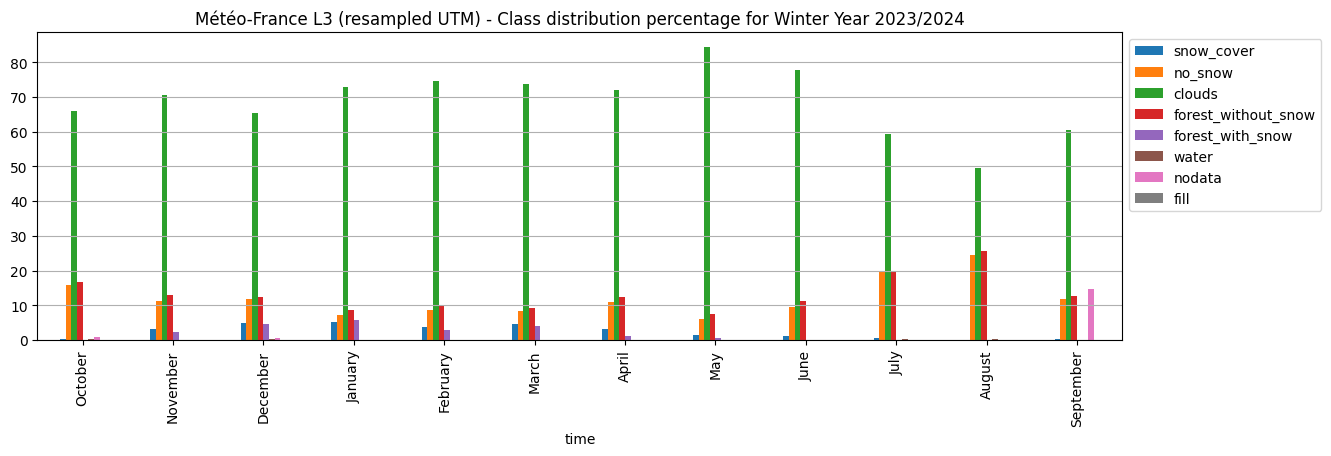

In [72]:
import matplotlib.pyplot as plt

fig,ax  = plt.subplots(figsize=(14,4))

ax.set_title(f"Météo-France L3 (resampled UTM) - Class distribution percentage for {str(winter_year)}")
month_percentages = meteofrance_stats_ds['percentage'].resample({'time': "1ME"}).mean()
classes_bar_distribution(month_percentages,ax=ax)

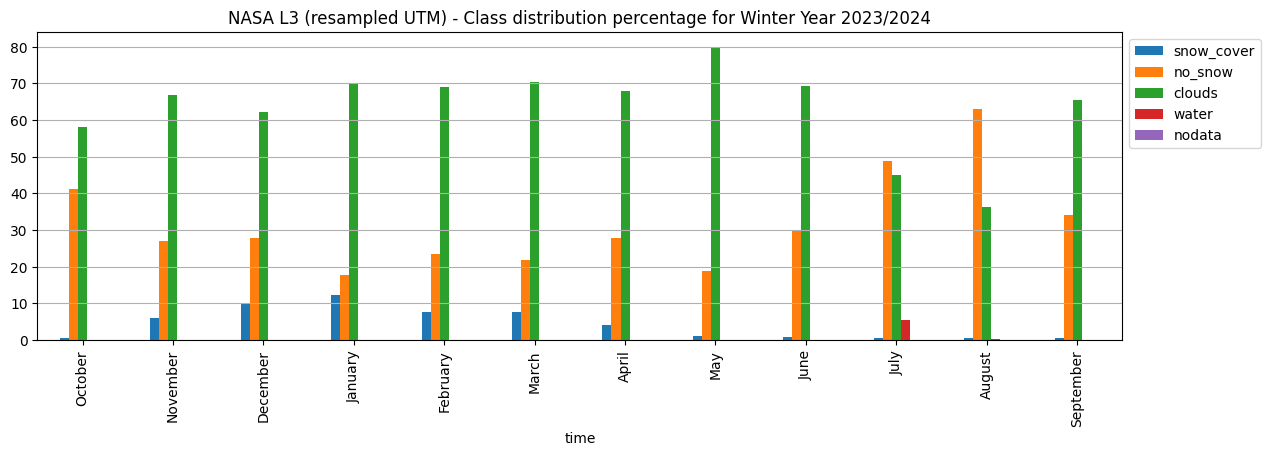

In [71]:
import matplotlib.pyplot as plt

fig,ax  = plt.subplots(figsize=(14,4))

ax.set_title(f"NASA L3 (resampled UTM) - Class distribution percentage for {str(winter_year)}")
classes_bar_distribution(nasa_stats_ds['percentage'].resample({'time': "1ME"}).mean(),ax=ax)


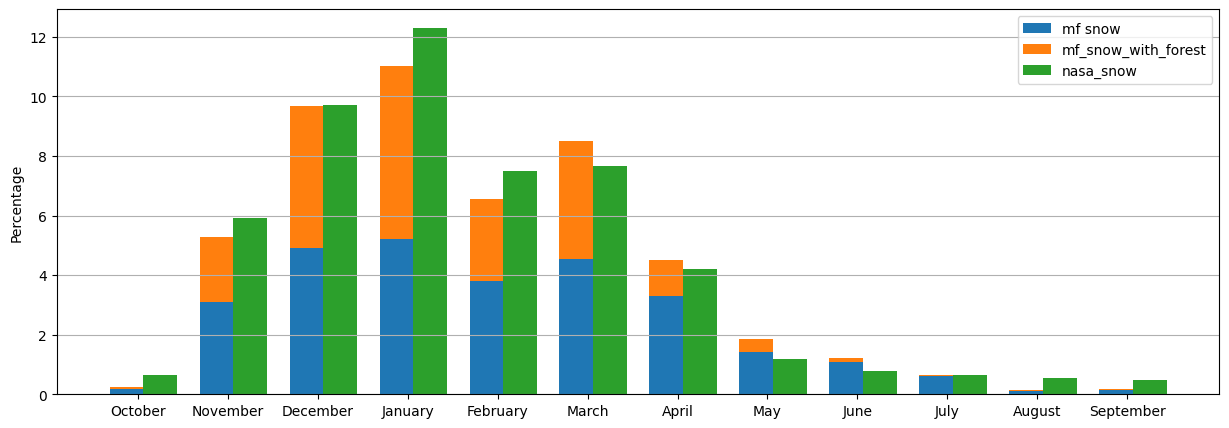

In [111]:
fig, ax = plt.subplots(figsize=(15,5))

meteofrance_means = meteofrance_stats_ds['percentage'].resample({'time': "1ME"}).mean()
nasa_means = nasa_stats_ds['percentage'].resample({'time': "1ME"}).mean()
mf_snow = [meteofrance_means.sel(class_name=cn).to_pandas() for cn in ['snow_cover', 'forest_with_snow']]
nasa_snow =nasa_means.sel(class_name='snow_cover').to_pandas() 
mf_snow.append(nasa_snow)
plot_multiple_stacked(data=mf_snow, ax=ax,stacked=[False, True, False], labels=['mf snow', 'mf_snow_with_forest', 'nasa_snow'], colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])

ax.set_xticklabels(mf_snow[0].index.strftime("%B"))
ax.set_ylabel('Percentage')
ax.grid(True,axis='y')
ax.legend()

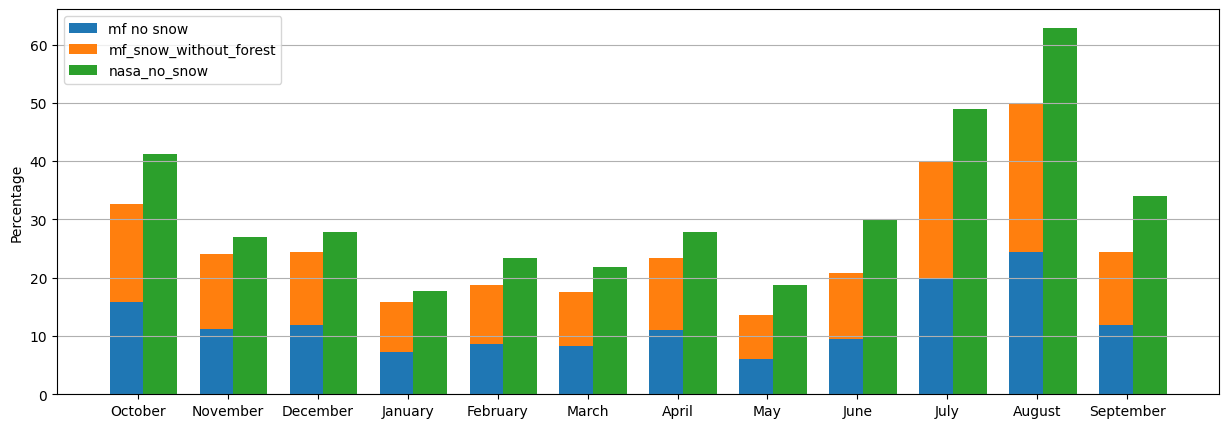

In [112]:
fig, ax = plt.subplots(figsize=(15,5))

meteofrance_means = meteofrance_stats_ds['percentage'].resample({'time': "1ME"}).mean()
nasa_means = nasa_stats_ds['percentage'].resample({'time': "1ME"}).mean()
mf_snow = [meteofrance_means.sel(class_name=cn).to_pandas() for cn in ['no_snow', 'forest_without_snow']]
nasa_snow =nasa_means.sel(class_name='no_snow').to_pandas() 
mf_snow.append(nasa_snow)
plot_multiple_stacked(data=mf_snow, ax=ax,stacked=[False, True, False], labels=['mf no snow', 'mf_snow_without_forest', 'nasa_no_snow'], colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])

ax.set_xticklabels(mf_snow[0].index.strftime("%B"))
ax.set_ylabel('Percentage')
ax.grid(True,axis='y')
ax.legend()

OLD ANALYSIS: done at native product projection

In [ ]:
import xarray as xr
from pathlib import Path
from winter_year import WinterYear
winter_year=WinterYear(2023,2024)
analyses_folder = "/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/cms_workshop"
nasa_stats_name = f'completeness_WY_{winter_year.from_year}_{winter_year.to_year}_SNPP_nasa_l3_res_375m.nc'
meteofrance_stats_name = f'completeness_WY_{winter_year.from_year}_{winter_year.to_year}_SNPP_meteofrance_l3_res_375m.nc'

meteofrance_stats_path= Path(f"{analyses_folder}").joinpath(meteofrance_stats_name)
nasa_stats_path= Path(f"{analyses_folder}").joinpath(nasa_stats_name)

meteofrance_stats_ds = xr.open_dataset(meteofrance_stats_path)
nasa_stats_ds = xr.open_dataset(nasa_stats_path)

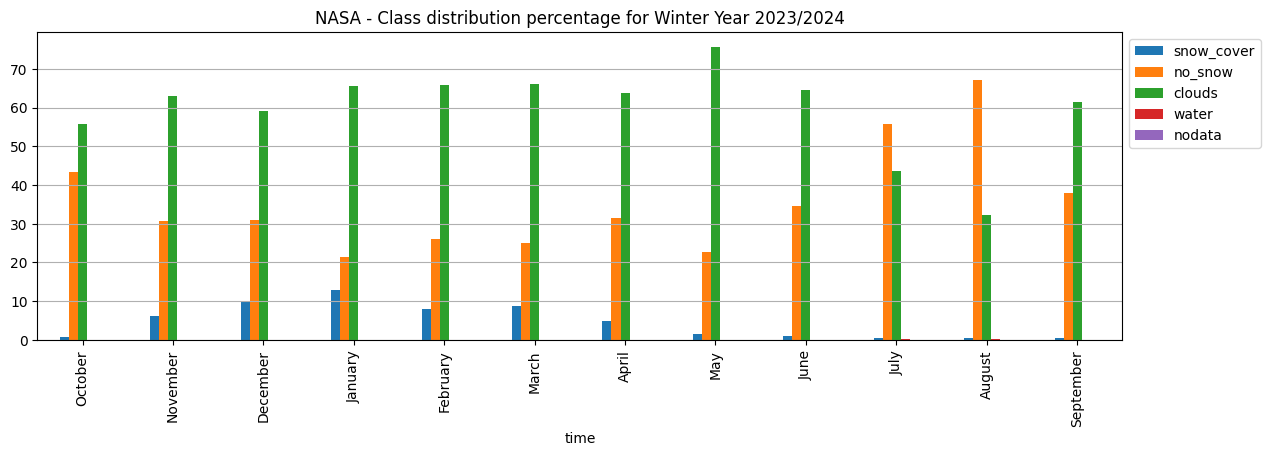

In [4]:
import matplotlib.pyplot as plt

fig,ax  = plt.subplots(figsize=(14,4))

ax.set_title(f"NASA - Class distribution percentage for {str(winter_year)}")
classes_bar_distribution(nasa_ds['class_distribution_percentage'],ax=ax)
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(True, axis='y')

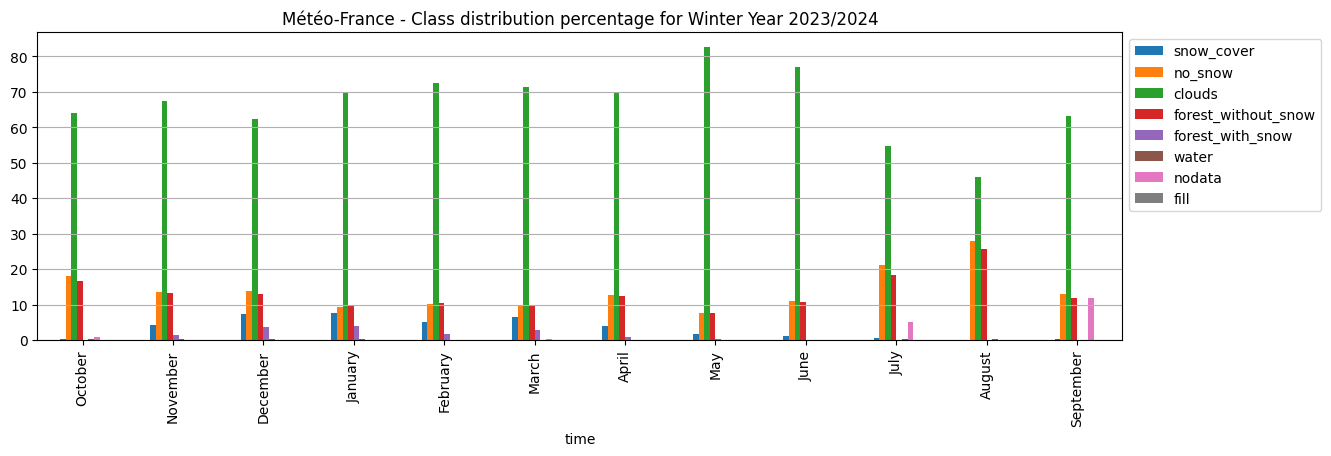

In [5]:
import matplotlib.pyplot as plt

fig,ax  = plt.subplots(figsize=(14,4))

ax.set_title(f"Météo-France - Class distribution percentage for {str(winter_year)}")
classes_bar_distribution(meteofrance_ds['class_distribution_percentage'],ax=ax)
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(True, axis='y')

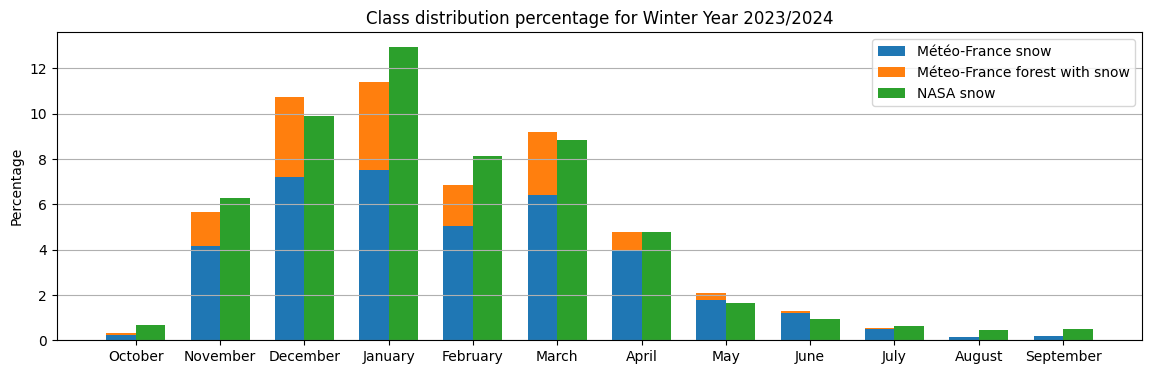

In [6]:
fig,ax  = plt.subplots(figsize=(14,4))
mf_snow = meteofrance_ds['class_distribution_percentage'].sel(class_name='snow_cover').to_pandas()
mf_forest_with_snow = meteofrance_ds['class_distribution_percentage'].sel(class_name='forest_with_snow').to_pandas()
nasa_snow = nasa_ds['class_distribution_percentage'].sel(class_name='snow_cover').to_pandas()

plot_stacked(mf_snow, mf_forest_with_snow, ax=ax,label1="Météo-France snow", label2="Méteo-France forest with snow")
plot_separate_bar(nasa_snow, ax=ax, label="NASA snow")
ax.set_xticklabels(mf_snow.index.strftime("%B"))
ax.set_ylabel('Percentage')
ax.grid(True,axis='y')
ax.legend()

plt.title(f'Class distribution percentage for {str(winter_year)}')
plt.show()

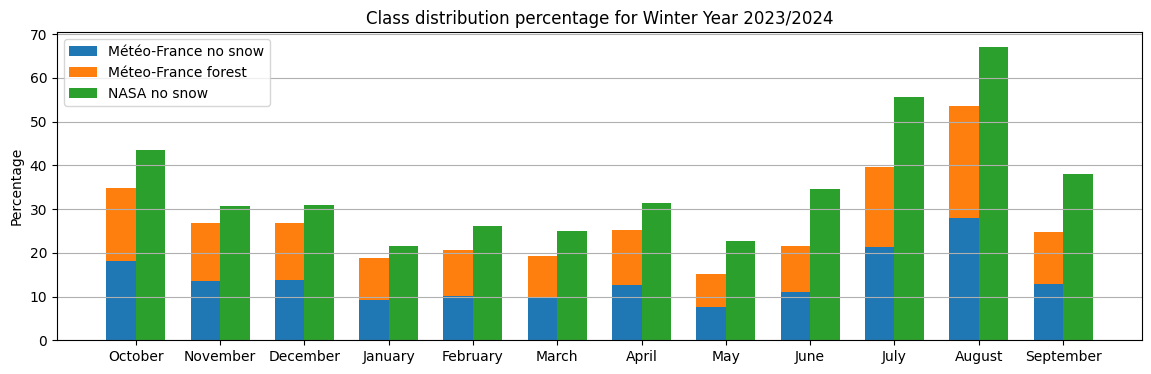

In [9]:
fig,ax  = plt.subplots(figsize=(14,4))
mf_no_snow = meteofrance_ds['class_distribution_percentage'].sel(class_name='no_snow').to_pandas()
mf_forest = meteofrance_ds['class_distribution_percentage'].sel(class_name='forest_without_snow').to_pandas()
nasa_no_snow = nasa_ds['class_distribution_percentage'].sel(class_name='no_snow').to_pandas()

plot_stacked(mf_no_snow, mf_forest, ax=ax,label1="Météo-France no snow", label2="Méteo-France forest")
plot_separate_bar(nasa_no_snow, ax=ax, label="NASA no snow")
ax.set_xticklabels(mf_no_snow.index.strftime("%B"))
ax.set_ylabel('Percentage')
ax.grid(True,axis='y')
ax.legend()

plt.title(f'Class distribution percentage for {str(winter_year)}')
plt.show()

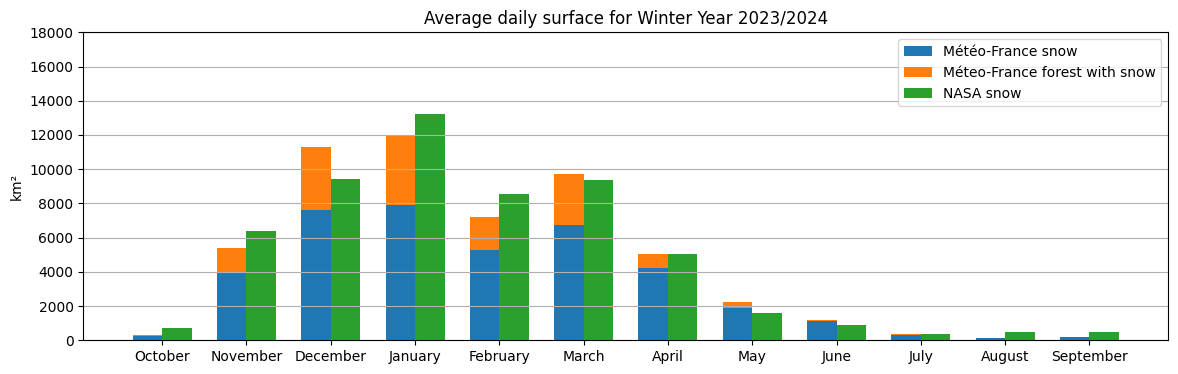

In [6]:
fig,ax  = plt.subplots(figsize=(14,4))
mf_snow = meteofrance_ds['class_distribution_area'].sel(class_name='snow_cover').to_pandas()*1e-6 / winter_year.days_per_month
mf_forest_with_snow = meteofrance_ds['class_distribution_area'].sel(class_name='forest_with_snow').to_pandas()*1e-6 / winter_year.days_per_month
nasa_snow = nasa_ds['class_distribution_area'].sel(class_name='snow_cover').to_pandas()*1e-6 / winter_year.days_per_month

plot_stacked(mf_snow, mf_forest_with_snow, ax=ax,label1="Météo-France snow", label2="Méteo-France forest with snow")
plot_separate_bar(nasa_snow, ax=ax, label="NASA snow")
ax.set_xticklabels(mf_snow.index.strftime("%B"))
ax.set_ylabel('km²')
ax.grid(True,axis='y')
ax.legend()
ax.set_ylim(0,18000)
plt.title(f'Average daily surface for {str(winter_year)}')
plt.show()

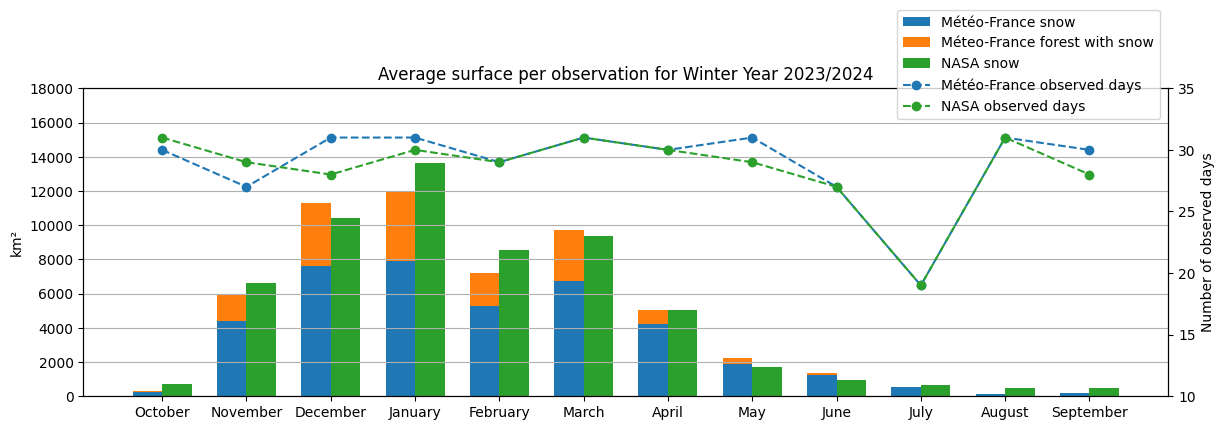

In [7]:
fig,ax  = plt.subplots(figsize=(14,4))
mf_snow = meteofrance_ds['class_distribution_area'].sel(class_name='snow_cover').to_pandas()*1e-6 / meteofrance_ds.data_vars['n_observed_days'].values
mf_forest_with_snow = meteofrance_ds['class_distribution_area'].sel(class_name='forest_with_snow').to_pandas()*1e-6  / meteofrance_ds.data_vars['n_observed_days'].values
nasa_snow = nasa_ds['class_distribution_area'].sel(class_name='snow_cover').to_pandas()*1e-6 / nasa_ds.data_vars['n_observed_days'].values

plot_stacked(mf_snow, mf_forest_with_snow, ax=ax,label1="Météo-France snow", label2="Méteo-France forest with snow", color1='tab:blue', color2='tab:orange')
plot_separate_bar(nasa_snow, ax=ax, label="NASA snow", color='tab:green')

ax.set_xticklabels(mf_snow.index.strftime("%B"))
ax.set_ylabel('km²')
ax.grid(True,axis='y')
ax.set_ylim(0,18000)


n_days_axis = ax.twinx()
n_days_axis.set_ylabel("Number of observed days")


n_days_axis.plot([i + 0.175 for i in range(12)], meteofrance_ds.data_vars['n_observed_days'], '--o', color='tab:blue', label='Météo-France observed days')
n_days_axis.plot([i + 0.175 for i in range(12)],nasa_ds.data_vars['n_observed_days'], '--o', color='tab:green', label='NASA observed days')
n_days_axis.set_xticks(ax.get_xticks())
n_days_axis.set_ylim(10, 35)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = n_days_axis.get_legend_handles_labels()
n_days_axis.legend(lines + lines2, labels + labels2, loc=(0.75,0.9))

plt.title(f'Average surface per observation for {str(winter_year)}')
plt.show()